# Numerical EDA

This notebook applies some of the learnings from statistic to time series EDA.

### Notebook Setup

In [10]:
%matplotlib inline

from __future__ import division
from __future__ import print_function

from math import sqrt

# ignore deprecation warnings in sklearn
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.style.use('ggplot')

### Load & Transform Sales Data

Daily sales data from Nov 17, 2017 through a recent Saturday

In [13]:
df_in = pd.read_excel('../data/daily-sales.xlsx', index_col='date', parse_dates=True)
df_sales = df_in.drop(['year', 'month', 'week', 'avg_sale'], axis='columns')
df_sales.head()

,day,is_open,is_holiday,sales,customers
date,,,,,
2017-11-17,fri,1,0,348.63,11
2017-11-18,sat,1,0,1334.38,16
2017-11-19,sun,0,0,0.00,0
2017-11-20,mon,1,0,512.08,3
2017-11-21,tue,1,0,0.00,0


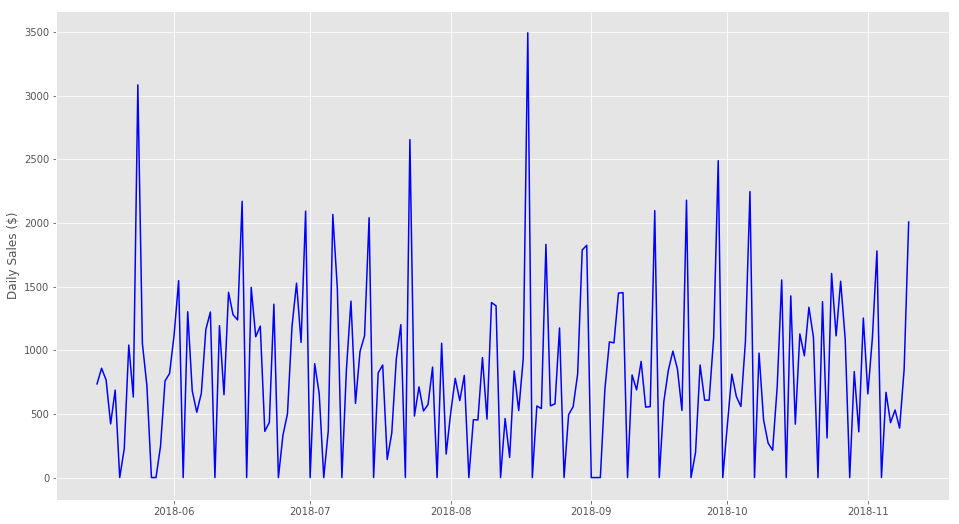

In [14]:
fig, ax = plt.subplots(figsize=(16,9))
plt.plot(df_sales['sales'][-180:], color='Blue')
plt.ylabel('Daily Sales ($)')
plt.show()

### Feature Correlation

As expected, sales are highly correlated to the number of customers. This is really bad for linear regression and in some cases can cause the model to become unstable. I didn't see anything as extreme as that but did find that using two strongly correlated features leads to lower model performance. I saw a noticeable decrease in RMSE when both customers and sales were used. It's definitely worth identifying and pruning correlated features up front in EDA.

In [4]:
df_sales.corr()

,is_open,is_holiday,sales,customers
is_open,1.000000,-0.222850,0.490954,0.575056
is_holiday,-0.222850,1.000000,-0.104317,-0.121370
sales,0.490954,-0.104317,1.000000,0.856733
customers,0.575056,-0.121370,0.856733,1.000000


### Autocorrelation

Autocorrelation measures correlation between a time series and a series of shifted versions of itself. Imagine taking the above time series of daily sales, shifting it by a day and measuring correlation then repeating many times. Doing so leads to the autocorrelation plot shown below. You can see high correlation in shifts (aka Lags) that are multiples of 7 days. This makes sense given the fairly regular weekly pattern of sales.

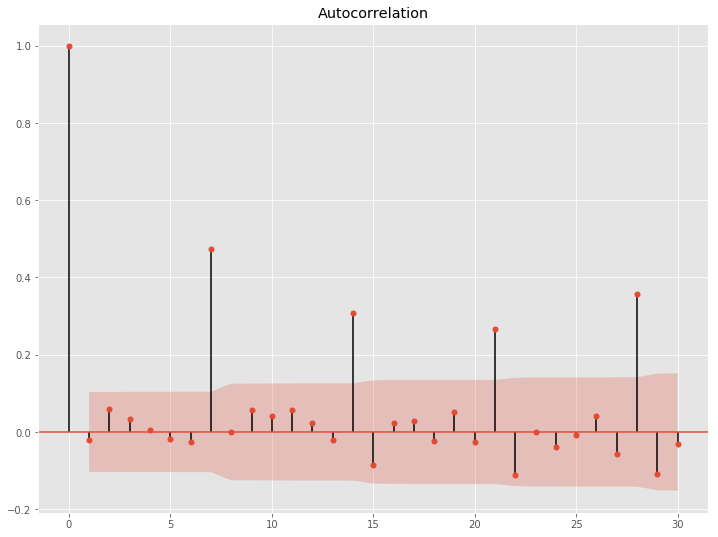

In [9]:
fig, ax = plt.subplots(figsize=(12,9))
plot_acf(df_sales['sales'], lags=30, ax=ax)
plt.show()

### Partial Autocorrelation

Partial autocorrelation removes the effect of any shorter lags. You can see this in the plot below where a 7 day lag influenced 14 and 21 day lags. With those removed, it's clear that there's a very strong autocellation at 7 days and a weaker one at 28 days.

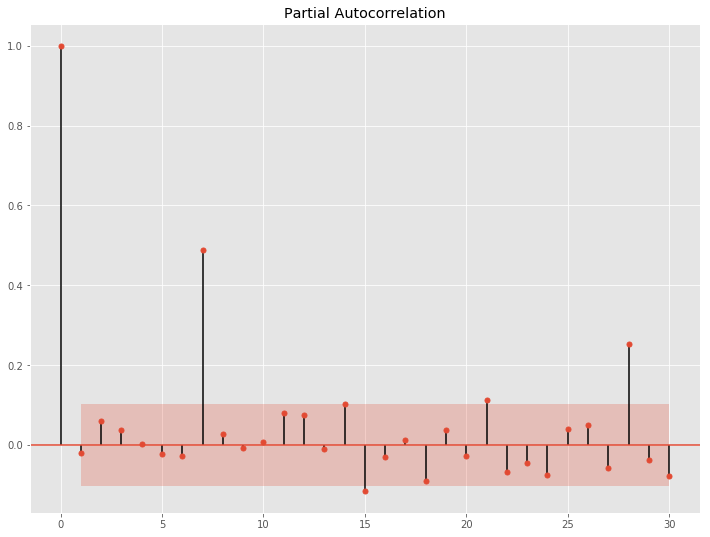

In [12]:
fig, ax = plt.subplots(figsize=(12,9))
plot_pacf(df_sales['sales'], lags=30, ax=ax)
plt.show()